In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import io
import matplotlib.pyplot as plt
ds=pd.read_excel("datasets_48024_87370_Bank_Personal_Loan_Modelling.xlsx")


In [34]:
print(ds.head())


   ID  Age  Experience  ...  CD Account  Online  CreditCard
0   1   25           1  ...           0       0           0
1   2   45          19  ...           0       0           0
2   3   39          15  ...           0       0           0
3   4   35           9  ...           0       0           0
4   5   35           8  ...           0       0           1

[5 rows x 14 columns]


In [35]:
print(ds.info)


<bound method DataFrame.info of         ID  Age  Experience  ...  CD Account  Online  CreditCard
0        1   25           1  ...           0       0           0
1        2   45          19  ...           0       0           0
2        3   39          15  ...           0       0           0
3        4   35           9  ...           0       0           0
4        5   35           8  ...           0       0           1
...    ...  ...         ...  ...         ...     ...         ...
4995  4996   29           3  ...           0       1           0
4996  4997   30           4  ...           0       1           0
4997  4998   63          39  ...           0       0           0
4998  4999   65          40  ...           0       1           0
4999  5000   28           4  ...           0       1           1

[5000 rows x 14 columns]>


In [4]:
print(ds.tail)

<bound method NDFrame.tail of         ID  Age  Experience  ...  CD Account  Online  CreditCard
0        1   25           1  ...           0       0           0
1        2   45          19  ...           0       0           0
2        3   39          15  ...           0       0           0
3        4   35           9  ...           0       0           0
4        5   35           8  ...           0       0           1
...    ...  ...         ...  ...         ...     ...         ...
4995  4996   29           3  ...           0       1           0
4996  4997   30           4  ...           0       1           0
4997  4998   63          39  ...           0       0           0
4998  4999   65          40  ...           0       1           0
4999  5000   28           4  ...           0       1           1

[5000 rows x 14 columns]>


In [36]:
print(ds.describe())

                ID          Age  ...       Online   CreditCard
count  5000.000000  5000.000000  ...  5000.000000  5000.000000
mean   2500.500000    45.338400  ...     0.596800     0.294000
std    1443.520003    11.463166  ...     0.490589     0.455637
min       1.000000    23.000000  ...     0.000000     0.000000
25%    1250.750000    35.000000  ...     0.000000     0.000000
50%    2500.500000    45.000000  ...     1.000000     0.000000
75%    3750.250000    55.000000  ...     1.000000     1.000000
max    5000.000000    67.000000  ...     1.000000     1.000000

[8 rows x 14 columns]


In [37]:
ds.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [38]:
experience=ds['Experience']
age=ds['Age']
correlation=experience.corr(age)
print(correlation)

0.9942148569683321


In [39]:
ds=ds.drop(['ID','Experience'],axis=1)
ds.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


In [40]:
ds.nunique()

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [41]:
ds.drop('ZIP Code',axis=1)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


In [42]:
(ds.Mortgage==0).sum()

3462

In [43]:
(ds.CCAvg==0).sum()

106

In [44]:
(ds.Family.value_counts())

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [45]:
ds.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [46]:
ds.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [47]:
print(ds['CD Account'].value_counts())

0    4698
1     302
Name: CD Account, dtype: int64


In [48]:
print(ds['Securities Account'].value_counts())

0    4478
1     522
Name: Securities Account, dtype: int64


In [49]:
print(ds['CreditCard'].value_counts())

0    3530
1    1470
Name: CreditCard, dtype: int64


AxesSubplot(0.125,0.125;0.775x0.755)


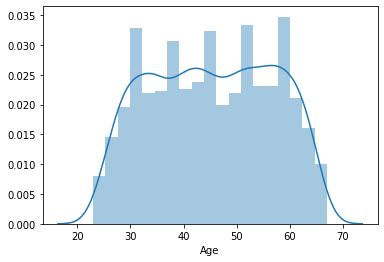

In [50]:
print(sns.distplot(ds.Age))


AxesSubplot(0.125,0.125;0.775x0.755)


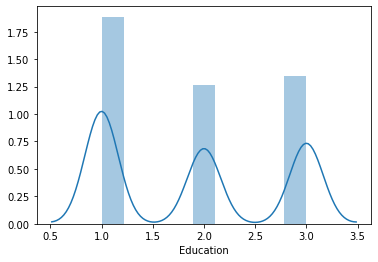

In [51]:
print(sns.distplot(ds.Education))

AxesSubplot(0.125,0.125;0.775x0.755)


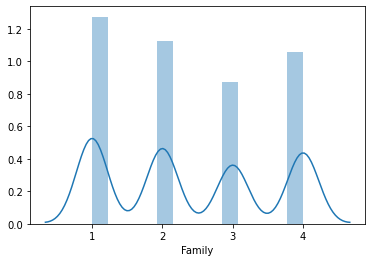

In [52]:
print(sns.distplot(ds.Family))

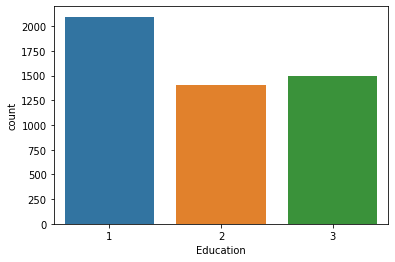

In [53]:
sns.countplot(ds.Education)

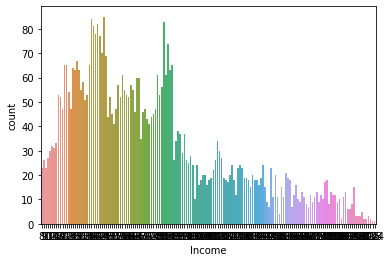

In [54]:
sns.countplot(ds.Income)

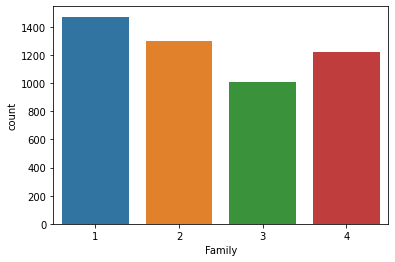

In [55]:
sns.countplot(ds.Family)

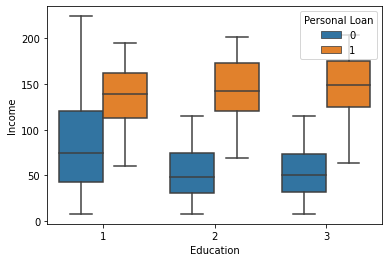

In [56]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=ds)

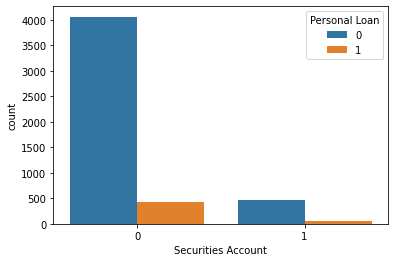

In [57]:
sns.countplot(x="Securities Account",data=ds,hue="Personal Loan")

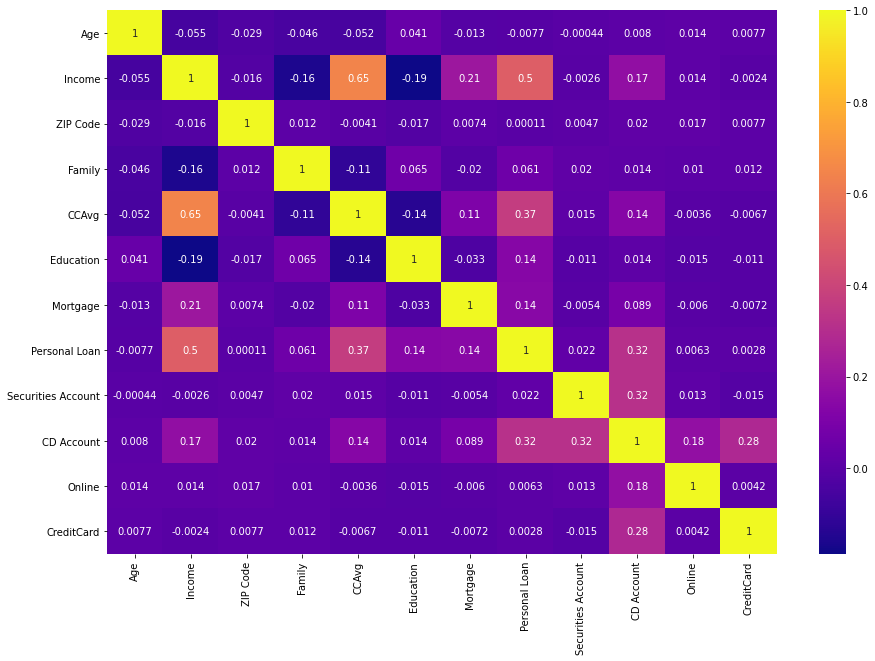

In [58]:
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(ds.corr(),cmap="plasma",annot=True)

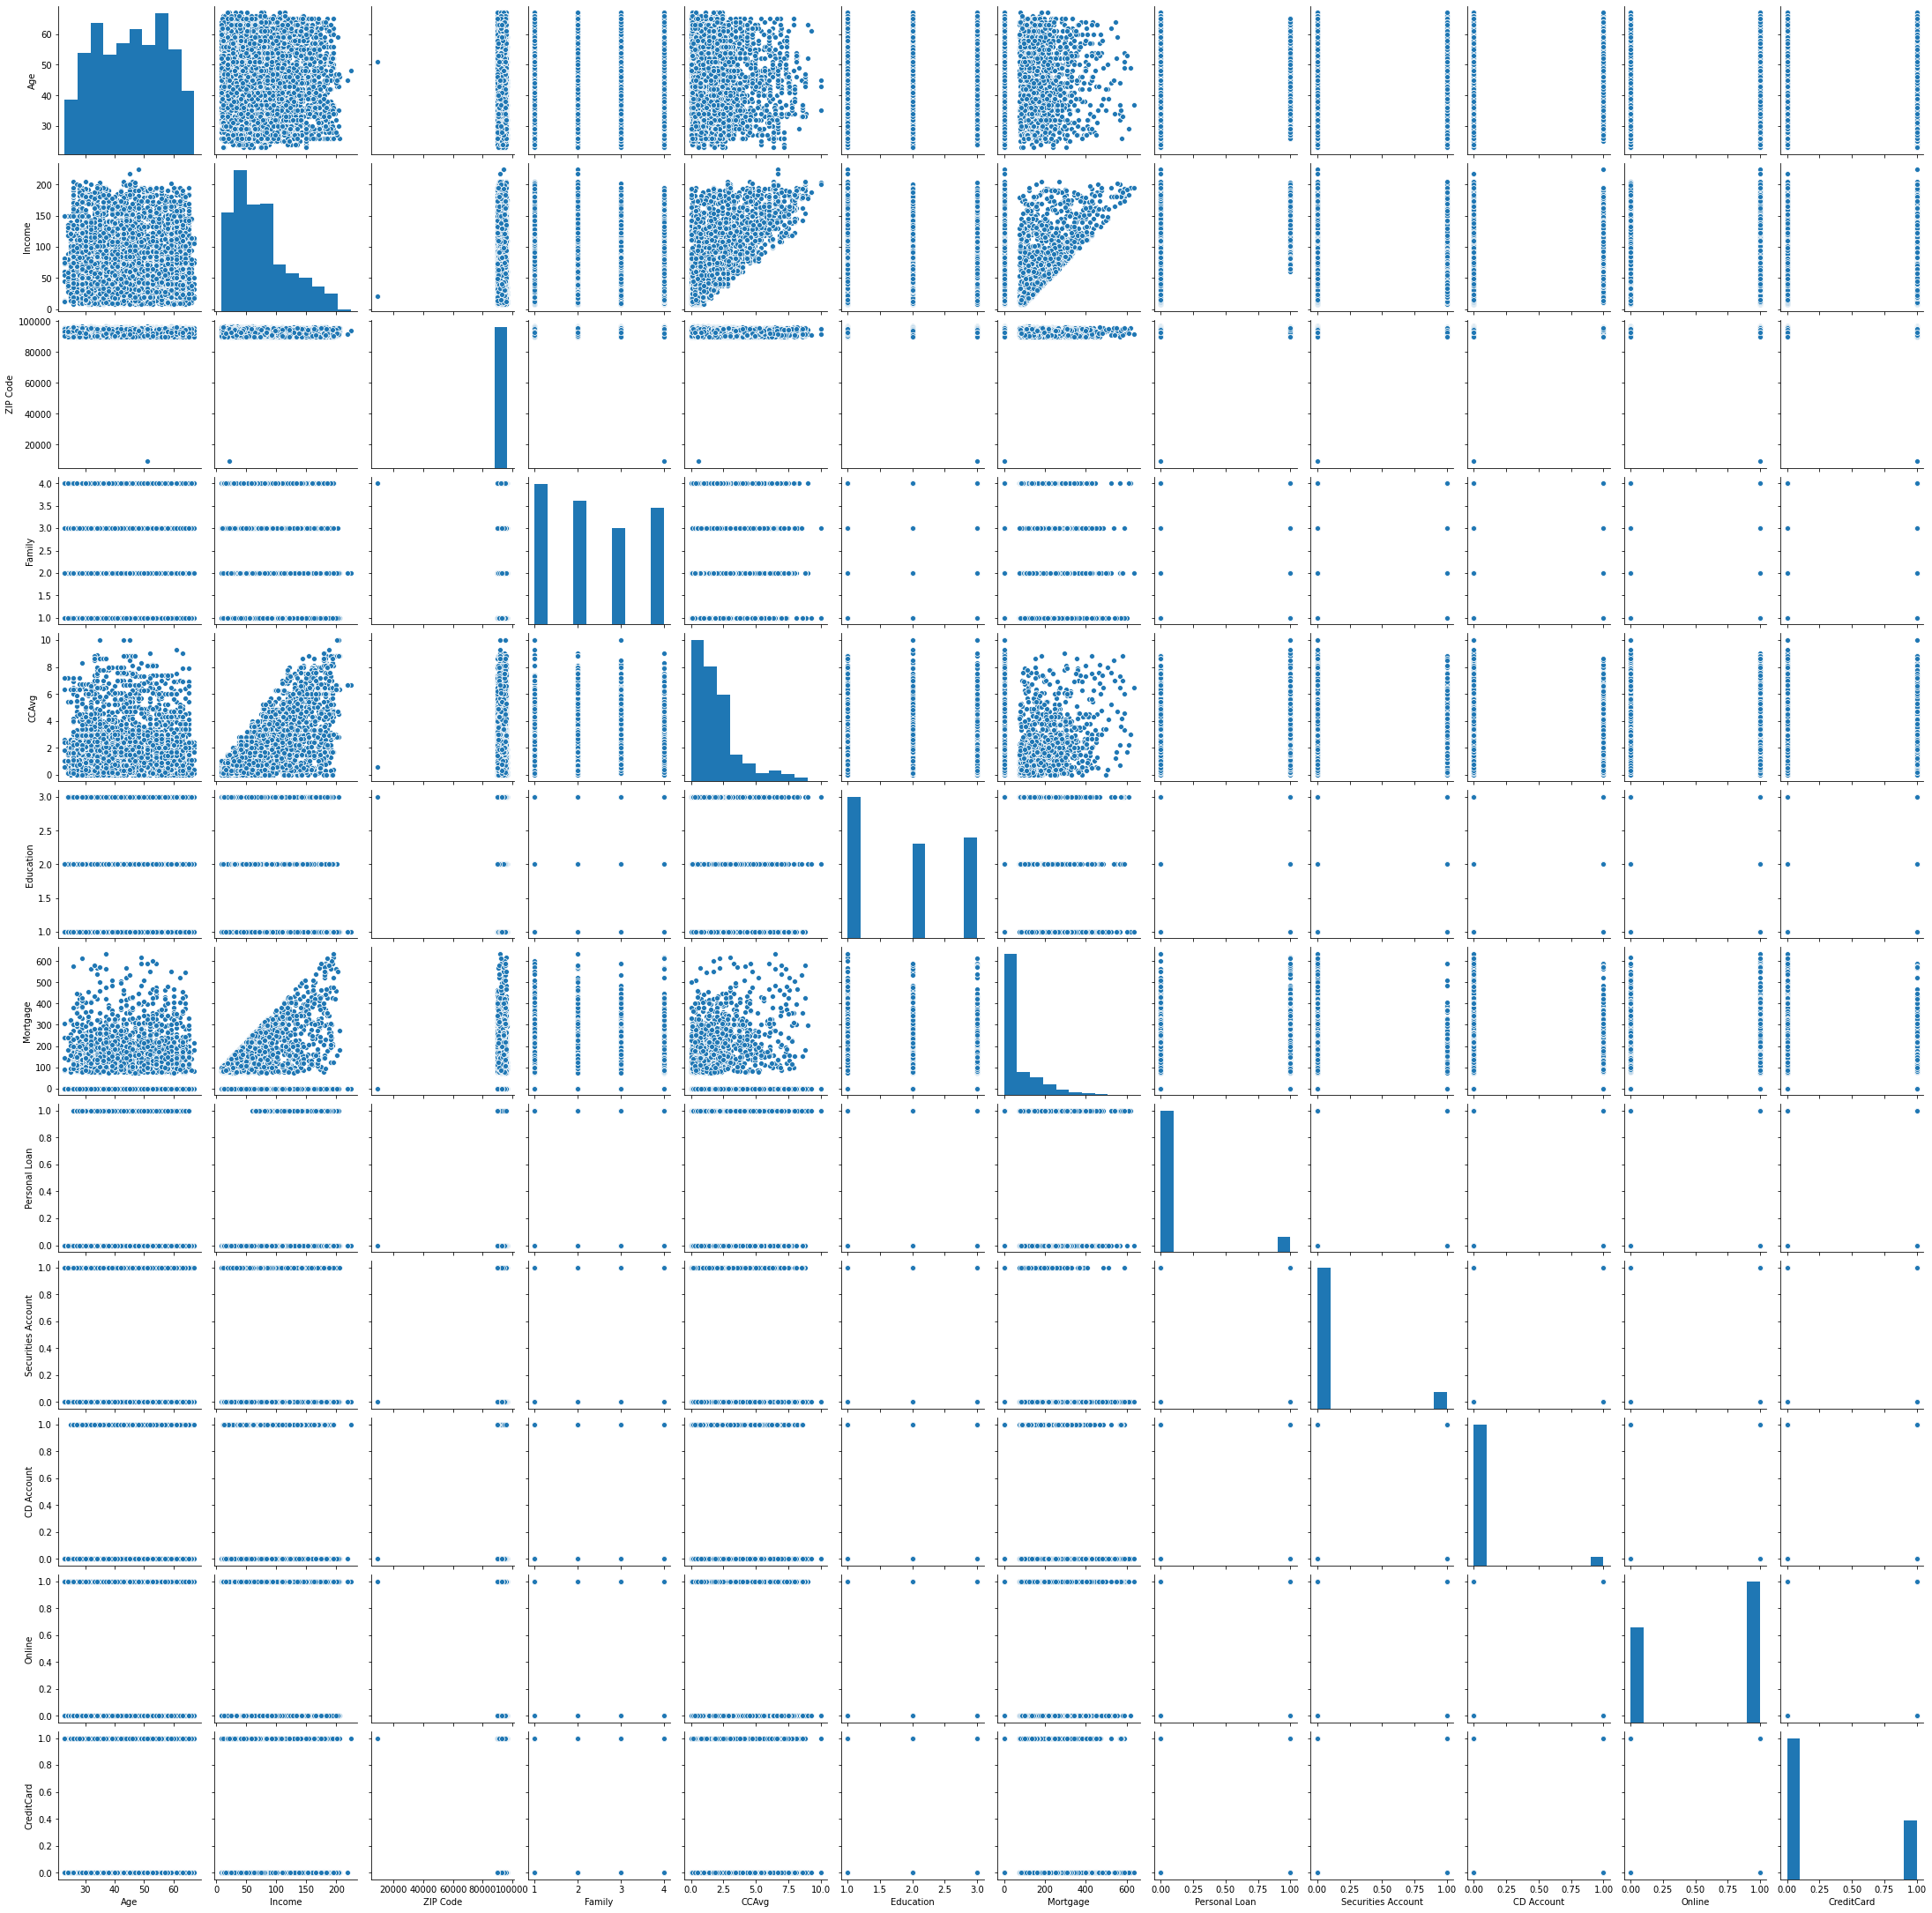

In [59]:
sns.pairplot(ds)

In [60]:
dsx=ds.loc[:,ds.columns != "Personal Loan"]
dsy=ds[["Personal Loan"]]
print(dsx)
print(dsy)

      Age  Income  ZIP Code  ...  CD Account  Online  CreditCard
0      25      49     91107  ...           0       0           0
1      45      34     90089  ...           0       0           0
2      39      11     94720  ...           0       0           0
3      35     100     94112  ...           0       0           0
4      35      45     91330  ...           0       0           1
...   ...     ...       ...  ...         ...     ...         ...
4995   29      40     92697  ...           0       1           0
4996   30      15     92037  ...           0       1           0
4997   63      24     93023  ...           0       0           0
4998   65      49     90034  ...           0       1           0
4999   28      83     92612  ...           0       1           1

[5000 rows x 11 columns]
      Personal Loan
0                 0
1                 0
2                 0
3                 0
4                 0
...             ...
4995              0
4996              0
4997          

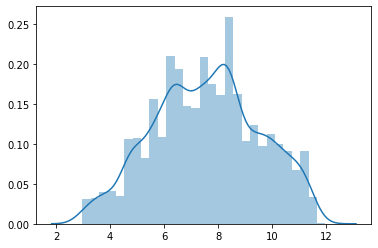

In [8]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(dsx['Income'].values.reshape(-1,1))
t=pt.transform(dsx['Income'].values.reshape(-1,1))
sns.distplot(t)

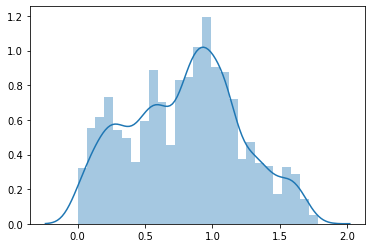

In [24]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(dsx['CCAvg'].values.reshape(-1,1))
t=pt.transform(dsx['CCAvg'].values.reshape(-1,1))
sns.distplot(t)

AxesSubplot(0.125,0.125;0.775x0.755)


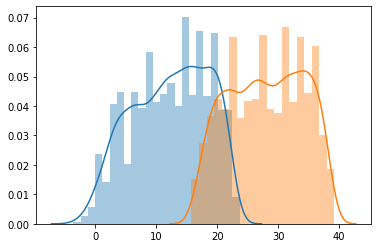

In [25]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(dsx['Experience'].values.reshape(-1,1))
t=pt.transform(dsx['Experience'].values.reshape(-1,1))
print(sns.distplot(t))
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(dsx['Age'].values.reshape(-1,1))
t=pt.transform(dsx['Age'].values.reshape(-1,1))
sns.distplot(t)

In [15]:
dsx["Mortgage_Int"]=pd.cut(dsx['Mortgage'],bins=[0,100,200,300,400,500,600,700],labels=[0,1,2,3,4,5,6],include_lowest=True)
dsx.drop("Mortgage",axis=1,inplace=True)
dsx.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_Int
0,1,25,1,49,91107,4,1.6,1,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,1,0


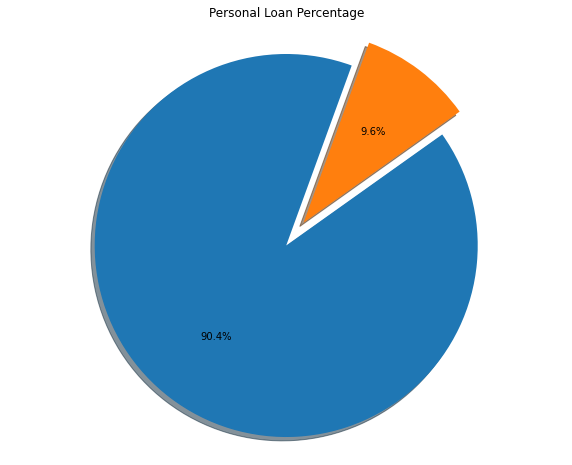

In [14]:
tDf=pd.DataFrame(ds["Personal Loan"].value_counts()).reset_index()
tDf.columns=["Labels","Personal Loan"]
fig1,ax1=plt.subplots(figsize=(10,8))
explode=(0,0.15)
ax1.pie(tDf["Personal Loan"],explode=explode,autopct='%1.1f%%',shadow=True,startangle=70)
ax1.axis('equal')
plt.title("Personal Loan Percentage")
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y=train_test_split(dsx,dsy,test_size=0.3,stratify=dsy,random_state=0)

In [30]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(train_X,train_Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
y_pred=classifier.predict(test_X)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [61]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
col_names=ds.columns
scaled=preprocessing.StandardScaler()
scaled_X_train=scaled.fit_transform(train_X)
scaled_X_test=scaled.fit_transform(test_X)


In [62]:
LogReg_model=LogisticRegression()
LogReg_model.fit(scaled_X_train,train_Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc

In [49]:
y_pred=LogReg_model.predict(scaled_X_train)
print(accuracy_score(train_Y,y_pred))
print(classification_report(train_Y,y_pred))
print(confusion_matrix(train_Y,y_pred))

0.9517142857142857
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3164
           1       0.82      0.64      0.72       336

    accuracy                           0.95      3500
   macro avg       0.89      0.81      0.85      3500
weighted avg       0.95      0.95      0.95      3500

[[3116   48]
 [ 121  215]]


In [52]:
LogReg_prob=LogReg_model.predict_proba(scaled_X_test)
fpr1,tpr1,thresholds1=roc_curve(test_Y,LogReg_prob[:,1])
roc_auc1=auc(fpr1,tpr1)
print("Area under ROC curve: %f" %roc_auc1)

Area under ROC curve: 0.956787


In [53]:
from sklearn.naive_bayes import GaussianNB
naive_model=GaussianNB()
naive_model.fit(scaled_X_train,train_Y)
y_pred=naive_model.predict(scaled_X_test)
print(accuracy_score(test_Y,y_pred))
print(classification_report(test_Y,y_pred))
print(confusion_matrix(test_Y,y_pred))


0.8926666666666667
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1356
           1       0.45      0.59      0.51       144

    accuracy                           0.89      1500
   macro avg       0.70      0.76      0.73      1500
weighted avg       0.91      0.89      0.90      1500

[[1254  102]
 [  59   85]]


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
naive_prob=naive_model.predict_proba(scaled_X_test)
fpr2,tpr2,thresholds2=roc_curve(test_Y,naive_prob[:,1])
roc_auc2=auc(fpr2,tpr2)
print("Area under ROC curve: %f" %roc_auc2)

Area under ROC curve: 0.930130


In [57]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(scaled_X_train,train_Y)
y_pred=KNN_model.predict(scaled_X_test)
print(accuracy_score(test_Y,y_pred))
print(classification_report(test_Y,y_pred))
print(confusion_matrix(test_Y,y_pred))

0.9553333333333334
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1356
           1       0.87      0.62      0.73       144

    accuracy                           0.96      1500
   macro avg       0.92      0.81      0.85      1500
weighted avg       0.95      0.96      0.95      1500

[[1343   13]
 [  54   90]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [58]:
KNN_prob=KNN_model.predict_proba(scaled_X_test)
fpr2,tpr2,thresholds2=roc_curve(test_Y,KNN_prob[:,1])
roc_auc2=auc(fpr2,tpr2)
print("Area under ROC curve: %f" %roc_auc2)

Area under ROC curve: 0.885478


In [59]:
from sklearn import svm
clf=svm.SVC(C=3,kernel='rbf',probability=True)
clf.fit(scaled_X_train,train_Y)
y_pred=clf.predict(scaled_X_test)
print(accuracy_score(test_Y,y_pred))
print(classification_report(test_Y,y_pred))
print(confusion_matrix(test_Y,y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9813333333333333
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1356
           1       0.96      0.84      0.90       144

    accuracy                           0.98      1500
   macro avg       0.97      0.92      0.94      1500
weighted avg       0.98      0.98      0.98      1500

[[1351    5]
 [  23  121]]


In [60]:
svm_prob=clf.predict_proba(scaled_X_test)
fpr2,tpr2,thresholds2=roc_curve(test_Y,svm_prob[:,1])
roc_auc2=auc(fpr2,tpr2)
print("Area under ROC curve: %f" %roc_auc2)

Area under ROC curve: 0.984995


In [66]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='entropy',random_state=1)
dtree.fit(scaled_X_train,train_Y)
y_pred=dtree.predict(scaled_X_test)
print(accuracy_score(test_Y,y_pred))
print(classification_report(test_Y,y_pred))
print(confusion_matrix(test_Y,y_pred))

0.9826666666666667
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.93      0.89      0.91       144

    accuracy                           0.98      1500
   macro avg       0.96      0.94      0.95      1500
weighted avg       0.98      0.98      0.98      1500

[[1346   10]
 [  16  128]]


In [67]:
dec_prob=dtree.predict_proba(scaled_X_test)
fpr2,tpr2,thresholds2=roc_curve(test_Y,dec_prob[:,1])
roc_auc2=auc(fpr2,tpr2)
print("Area under ROC curve: %f" %roc_auc2)

Area under ROC curve: 0.940757


In [68]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',random_state=1)
dtree.fit(scaled_X_train,train_Y)
y_pred=dtree.predict(scaled_X_test)
print(accuracy_score(test_Y,y_pred))
print(classification_report(test_Y,y_pred))
print(confusion_matrix(test_Y,y_pred))

0.9833333333333333
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.94      0.88      0.91       144

    accuracy                           0.98      1500
   macro avg       0.96      0.94      0.95      1500
weighted avg       0.98      0.98      0.98      1500

[[1348    8]
 [  17  127]]


In [69]:
dec_prob=dtree.predict_proba(scaled_X_test)
fpr2,tpr2,thresholds2=roc_curve(test_Y,dec_prob[:,1])
roc_auc2=auc(fpr2,tpr2)
print("Area under ROC curve: %f" %roc_auc2)

Area under ROC curve: 0.938022


In [71]:
from sklearn.ensemble import BaggingClassifier
bgcl=BaggingClassifier(base_estimator=dtree,n_estimators=250,max_samples=0.7,oob_score=True,random_state=56)
bgcl.fit(scaled_X_train,train_Y)
y_pred=bgcl.predict(scaled_X_test)
print(accuracy_score(test_Y,y_pred))
print(classification_report(test_Y,y_pred))
print(confusion_matrix(test_Y,y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.984
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.96      0.87      0.91       144

    accuracy                           0.98      1500
   macro avg       0.97      0.93      0.95      1500
weighted avg       0.98      0.98      0.98      1500

[[1351    5]
 [  19  125]]


In [73]:
bgcl_prob=bgcl.predict_proba(scaled_X_test)
fpr2,tpr2,thresholds2=roc_curve(test_Y,bgcl_prob[:,1])
roc_auc2=auc(fpr2,tpr2)
print("Area under ROC curve: %f" %roc_auc2)
print("The out of box score is given by ",bgcl.oob_score_)

Area under ROC curve: 0.989924
The out of box score is given by  0.986


In [75]:
from sklearn.ensemble import RandomForestClassifier
rand_for=RandomForestClassifier(criterion='entropy',n_estimators=150,max_features=6,oob_score=True,random_state=14)
rand_for.fit(scaled_X_train,train_Y)
y_pred=rand_for.predict(scaled_X_test)
print(accuracy_score(test_Y,y_pred))
print(classification_report(test_Y,y_pred))
print(confusion_matrix(test_Y,y_pred))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.986
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.96      0.89      0.92       144

    accuracy                           0.99      1500
   macro avg       0.98      0.94      0.96      1500
weighted avg       0.99      0.99      0.99      1500

[[1351    5]
 [  16  128]]


In [78]:
rand_for_prob=rand_for.predict_proba(scaled_X_test)
fpr2,tpr2,thresholds2=roc_curve(test_Y,rand_for_prob[:,1])
roc_auc2=auc(fpr2,tpr2)
print("Area under ROC curve: %f" %roc_auc2)
print("The out of box score is given by ",rand_for.oob_score_)

Area under ROC curve: 0.996218
The out of box score is given by  0.986


In [80]:
from sklearn.ensemble import RandomForestClassifier
rand_for=RandomForestClassifier(criterion='gini',n_estimators=150,max_features=6,oob_score=True,random_state=14)
rand_for.fit(scaled_X_train,train_Y)
y_pred=rand_for.predict(scaled_X_test)
print(accuracy_score(test_Y,y_pred))
print(classification_report(test_Y,y_pred))
print(confusion_matrix(test_Y,y_pred))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.986
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.97      0.88      0.92       144

    accuracy                           0.99      1500
   macro avg       0.98      0.94      0.96      1500
weighted avg       0.99      0.99      0.99      1500

[[1352    4]
 [  17  127]]


In [81]:
rand_for_prob=rand_for.predict_proba(scaled_X_test)
fpr2,tpr2,thresholds2=roc_curve(test_Y,rand_for_prob[:,1])
roc_auc2=auc(fpr2,tpr2)
print("Area under ROC curve: %f" %roc_auc2)
print("The out of box score is given by ",rand_for.oob_score_)

Area under ROC curve: 0.995258
The out of box score is given by  0.988


In [64]:
from sklearn.ensemble import ExtraTreesClassifier
eTree=ExtraTreesClassifier(n_estimators=100,max_features=9,random_state=14)
eTree.fit(scaled_X_train,train_Y)
y_pred=eTree.predict(scaled_X_test)
print(accuracy_score(test_Y,y_pred))
print(classification_report(test_Y,y_pred))
print(confusion_matrix(test_Y,y_pred))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.9893333333333333
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.98      0.90      0.94       144

    accuracy                           0.99      1500
   macro avg       0.99      0.95      0.97      1500
weighted avg       0.99      0.99      0.99      1500

[[1354    2]
 [  14  130]]


In [66]:
eTree_prob=eTree.predict_proba(scaled_X_test)
fpr2,tpr2,thresholds2=roc_curve(test_Y,eTree_prob[:,1])
roc_auc2=auc(fpr2,tpr2)
print("Area under ROC curve: %f" %roc_auc2)

Area under ROC curve: 0.997112


By this model we can predict suitable person for our business and the required income which he should get,based on family, age, experience and several other factors.
By this model we can predict the output accurately.